## Dimensionality Reduction
As the name says, dimensionality reduction is the idea of reducing your feature set to a much smaller number. Dimensionality reduction is often used in visualization of datasets to try and detect samples that are similar. We will cover three dimensionality reduction techniques here: 
1. t-SNE
2. PCA
3. umap

In [1]:
# Packages we will use throughout this notebook
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

LoadError: ArgumentError: Package UMAP [c4f8c510-2410-5be4-91d7-4fbaeb39457e] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.


We will use a dataset from the VegaDatasets package. The dataset is about car specifications of over 400 car models.

In [2]:
C = DataFrame(VegaDatasets.dataset("cars"))

LoadError: UndefVarError: VegaDatasets not defined

In [3]:
dropmissing!(C)
M = Matrix(C[:,2:7])
names(C)

LoadError: UndefVarError: dropmissing! not defined

In [4]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

LoadError: UndefVarError: C not defined

### 1️⃣ PCA 
We will first center the data.

In [5]:
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

LoadError: UndefVarError: M not defined

PCA expects each column to be an observation, so we will use the transpose of the matrix.

In [6]:
# each car is now a column, PCA takes features - by - samples matrix
data'

LoadError: UndefVarError: data not defined

First, we will fit the model via PCA. `maxoutdim` is the output dimensions, we want it to be 2 in this case.

In [7]:
p = fit(PCA,data',maxoutdim=2)

LoadError: UndefVarError: data not defined

We can obtain the projection matrix by calling the function `projection`

In [8]:
P = projection(p)

LoadError: UndefVarError: projection not defined

Now that we have the projection matrix, `P`, we can apply it on one car as follows:

In [9]:
P'*(data[1,:]-mean(p))

LoadError: UndefVarError: P not defined

Or we can transorm all the data via the transform function.

In [10]:
Yte = MultivariateStats.transform(p, data') #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

LoadError: UndefVarError: MultivariateStats not defined

We can also go back from two dimensions to 6 dimensions, via the `reconstruct` function... But this time, it will be approximate.

In [11]:
# reconstruct testing observations (approximately)
Xr = reconstruct(p, Yte)

LoadError: UndefVarError: reconstruct not defined

In [12]:
norm(Xr-data') # this won't be zero

LoadError: UndefVarError: data not defined

Finally, we will generate a scatter plot of the cars:

In [13]:
Plots.scatter(Yte[1,:],Yte[2,:])

LoadError: UndefVarError: Plots not defined

In [14]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

LoadError: UndefVarError: car_origin not defined

This is interesting! There seems to be three main clusters with cars from the US dominating two clusters.

In [15]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false)

LoadError: UndefVarError: data not defined

This is a 3d plot, but eventhough you can set the camera view, you won't be able to move the 3d plot around. Let's use another package for this purpose. We will use `Mackie`.

In [16]:
using GLMakie
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

LoadError: ArgumentError: Package GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.


And now, you can call `display(scene)` to create an interactive gui.

In [17]:
display(scene)

LoadError: UndefVarError: scene not defined

### 2️⃣ t-SNE
The next method we will use for dimensionality reduction is t-SNE. There are multiple ways you can call t-SNE from julia. Check out this notebook: https://github.com/nassarhuda/JuliaTutorials/blob/master/TSNE/TSNE.ipynb. But we will take this opportunity to try out something new... Call a function from the Scikit learn python package. This makes use of the package `ScikitLearn`.

┌ Info: Installing sklearn via the Conda scikit-learn package...
└ @ PyCall /Users/logankilpatrick/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda /Users/logankilpatrick/.julia/packages/Conda/sNGum/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/logankilpatrick/.julia/conda/3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.2        |   py38hb2f4e1b_0         4.9 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          17 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/osx-64::scikit-learn-0.24.2-py38hb2f4e1b_0
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.1.0-pyh5ca1d4c_0



scikit-learn-0.24.2  | 4.9 MB    | #################################### | 100% 
joblib-1.0.1       

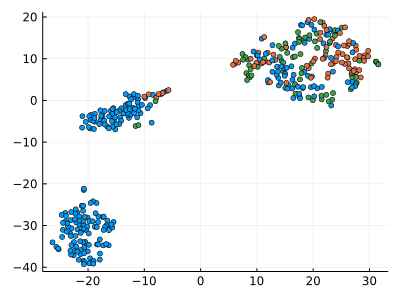

In [22]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

This is interesting! The same patterns appears to hold here too. 

### 3️⃣ Next, UMAP
This will be our final dimensionality reduction method and we will use the package `UMAP` for it.

In [23]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 -6.21828  -6.74166  -6.06368  -6.37369  …   2.87221  6.41146  6.54725
 -5.30016  -5.57061  -5.86658  -5.3112      -3.53104  1.47467  1.42146

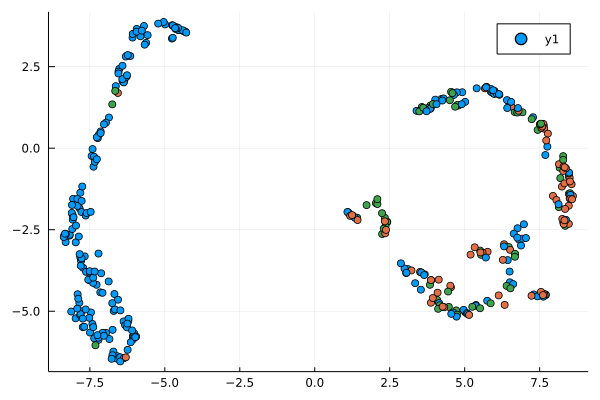

In [24]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

For UMAP, we can create distances between every pair of observations differently, if we choose to. But even with both choices, we will see that UMAP generates a very similar pattern to what we have observed with t-SNE and PCA.

In [25]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
  7.97172   9.97302    8.69386   8.65178  …  -6.35568  -3.924    -3.74242
 -3.46232  -0.840573  -3.34202  -3.31067      5.70094   3.44536   3.69962

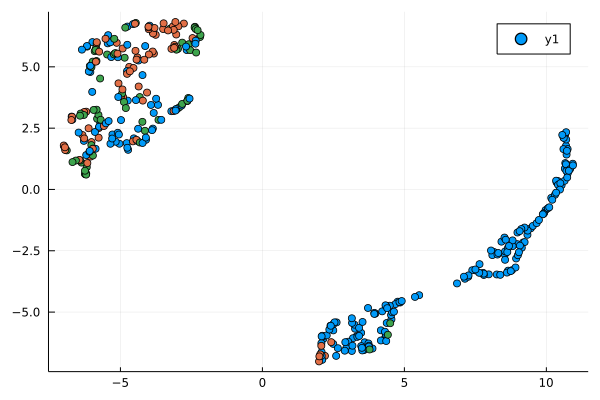

In [26]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

# Finally...
After finishing this notebook, you should be able to:
- [ ] apply tsne on your data
- [ ] apply umap on your data
- [ ] apply pca on your data
- [ ] generate a 3d plot
- [ ] call a function from Python's ScikitLearn